In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
df = pd.read_csv('heart.csv')

In [29]:
#Over view of dataset and number of observation and features
print('-->First 5 observations:\n\n',df.head(),'\n')
print('----------------------------------------------\n')
print('-->There are',df.shape[0],'no. of observation and',df.shape[1],'no.of features in our dataset \n')

-->First 5 observations:

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1   

----------------------------------------------

-->There are 303 no. of observation and 14 no.of features in our dataset 



In [30]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [31]:
#Look for missing valus
df.isna().sum()

# here we can see that we have no null values so we need not to clean the data

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
#Overview of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
# here we have declared the count, mean, stdev, etc. of our data
# For e.g. : age's count, mean, std, min , etc.
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [34]:
print("Total target counts of 0's and 1's \n",df.target.value_counts())

Total target counts of 0's and 1's 
 1    165
0    138
Name: target, dtype: int64


<AxesSubplot:ylabel='target'>

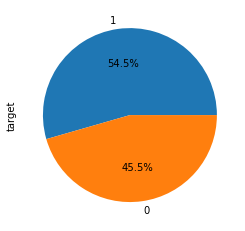

In [35]:
df.target.value_counts().plot(kind="pie",autopct='%1.1f%%')

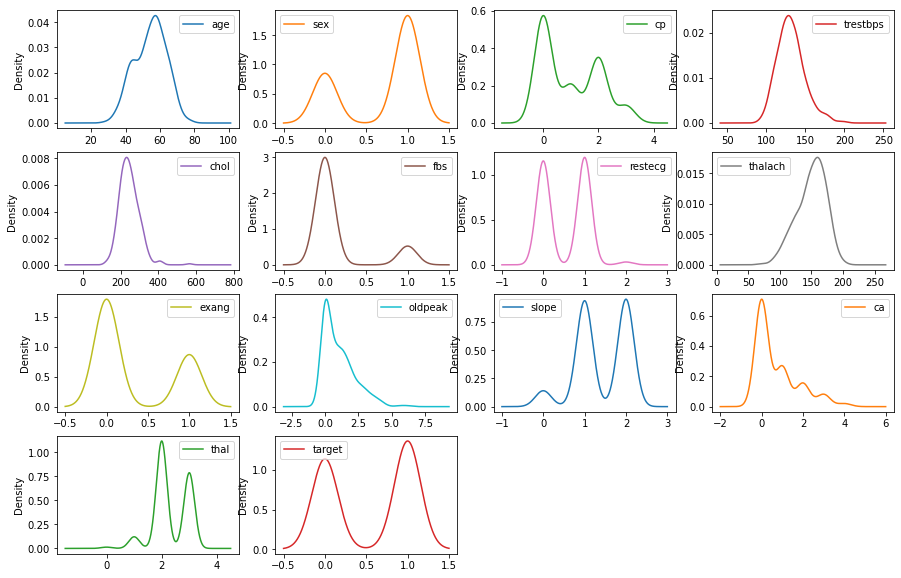

In [36]:
# This is the line graph of each and every data

df.plot(kind= 'kde' , subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))

plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

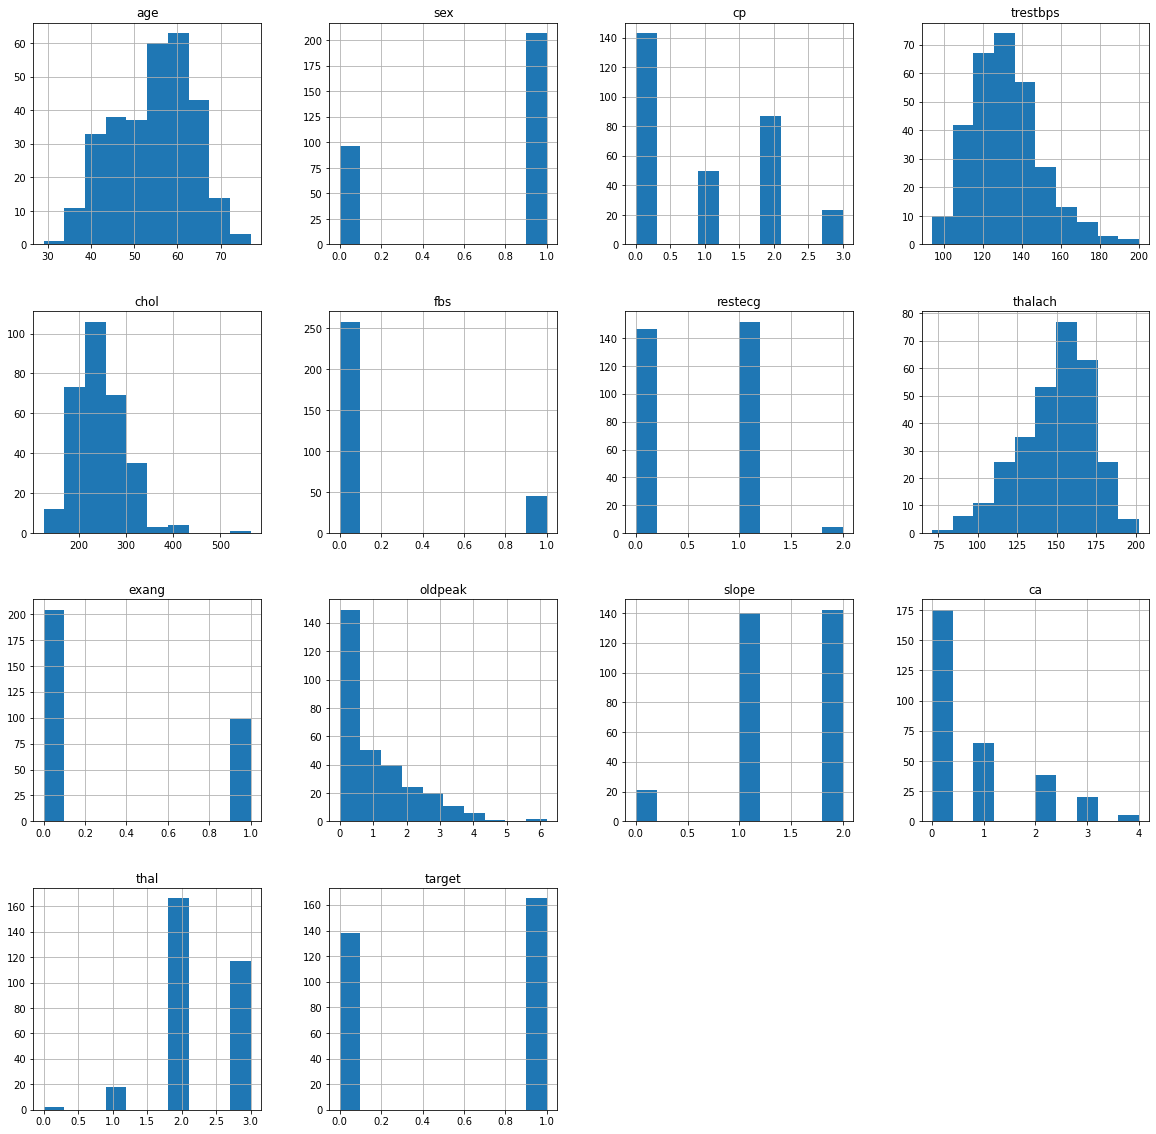

In [37]:
#Histogram
df.hist(figsize = (20,20)) 


<AxesSubplot:>

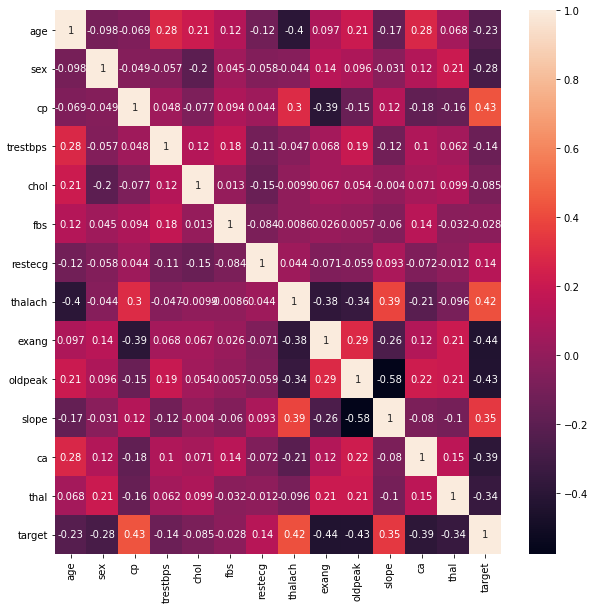

In [38]:
#Plot correlation to find see relation between variables
#  A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.
#The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

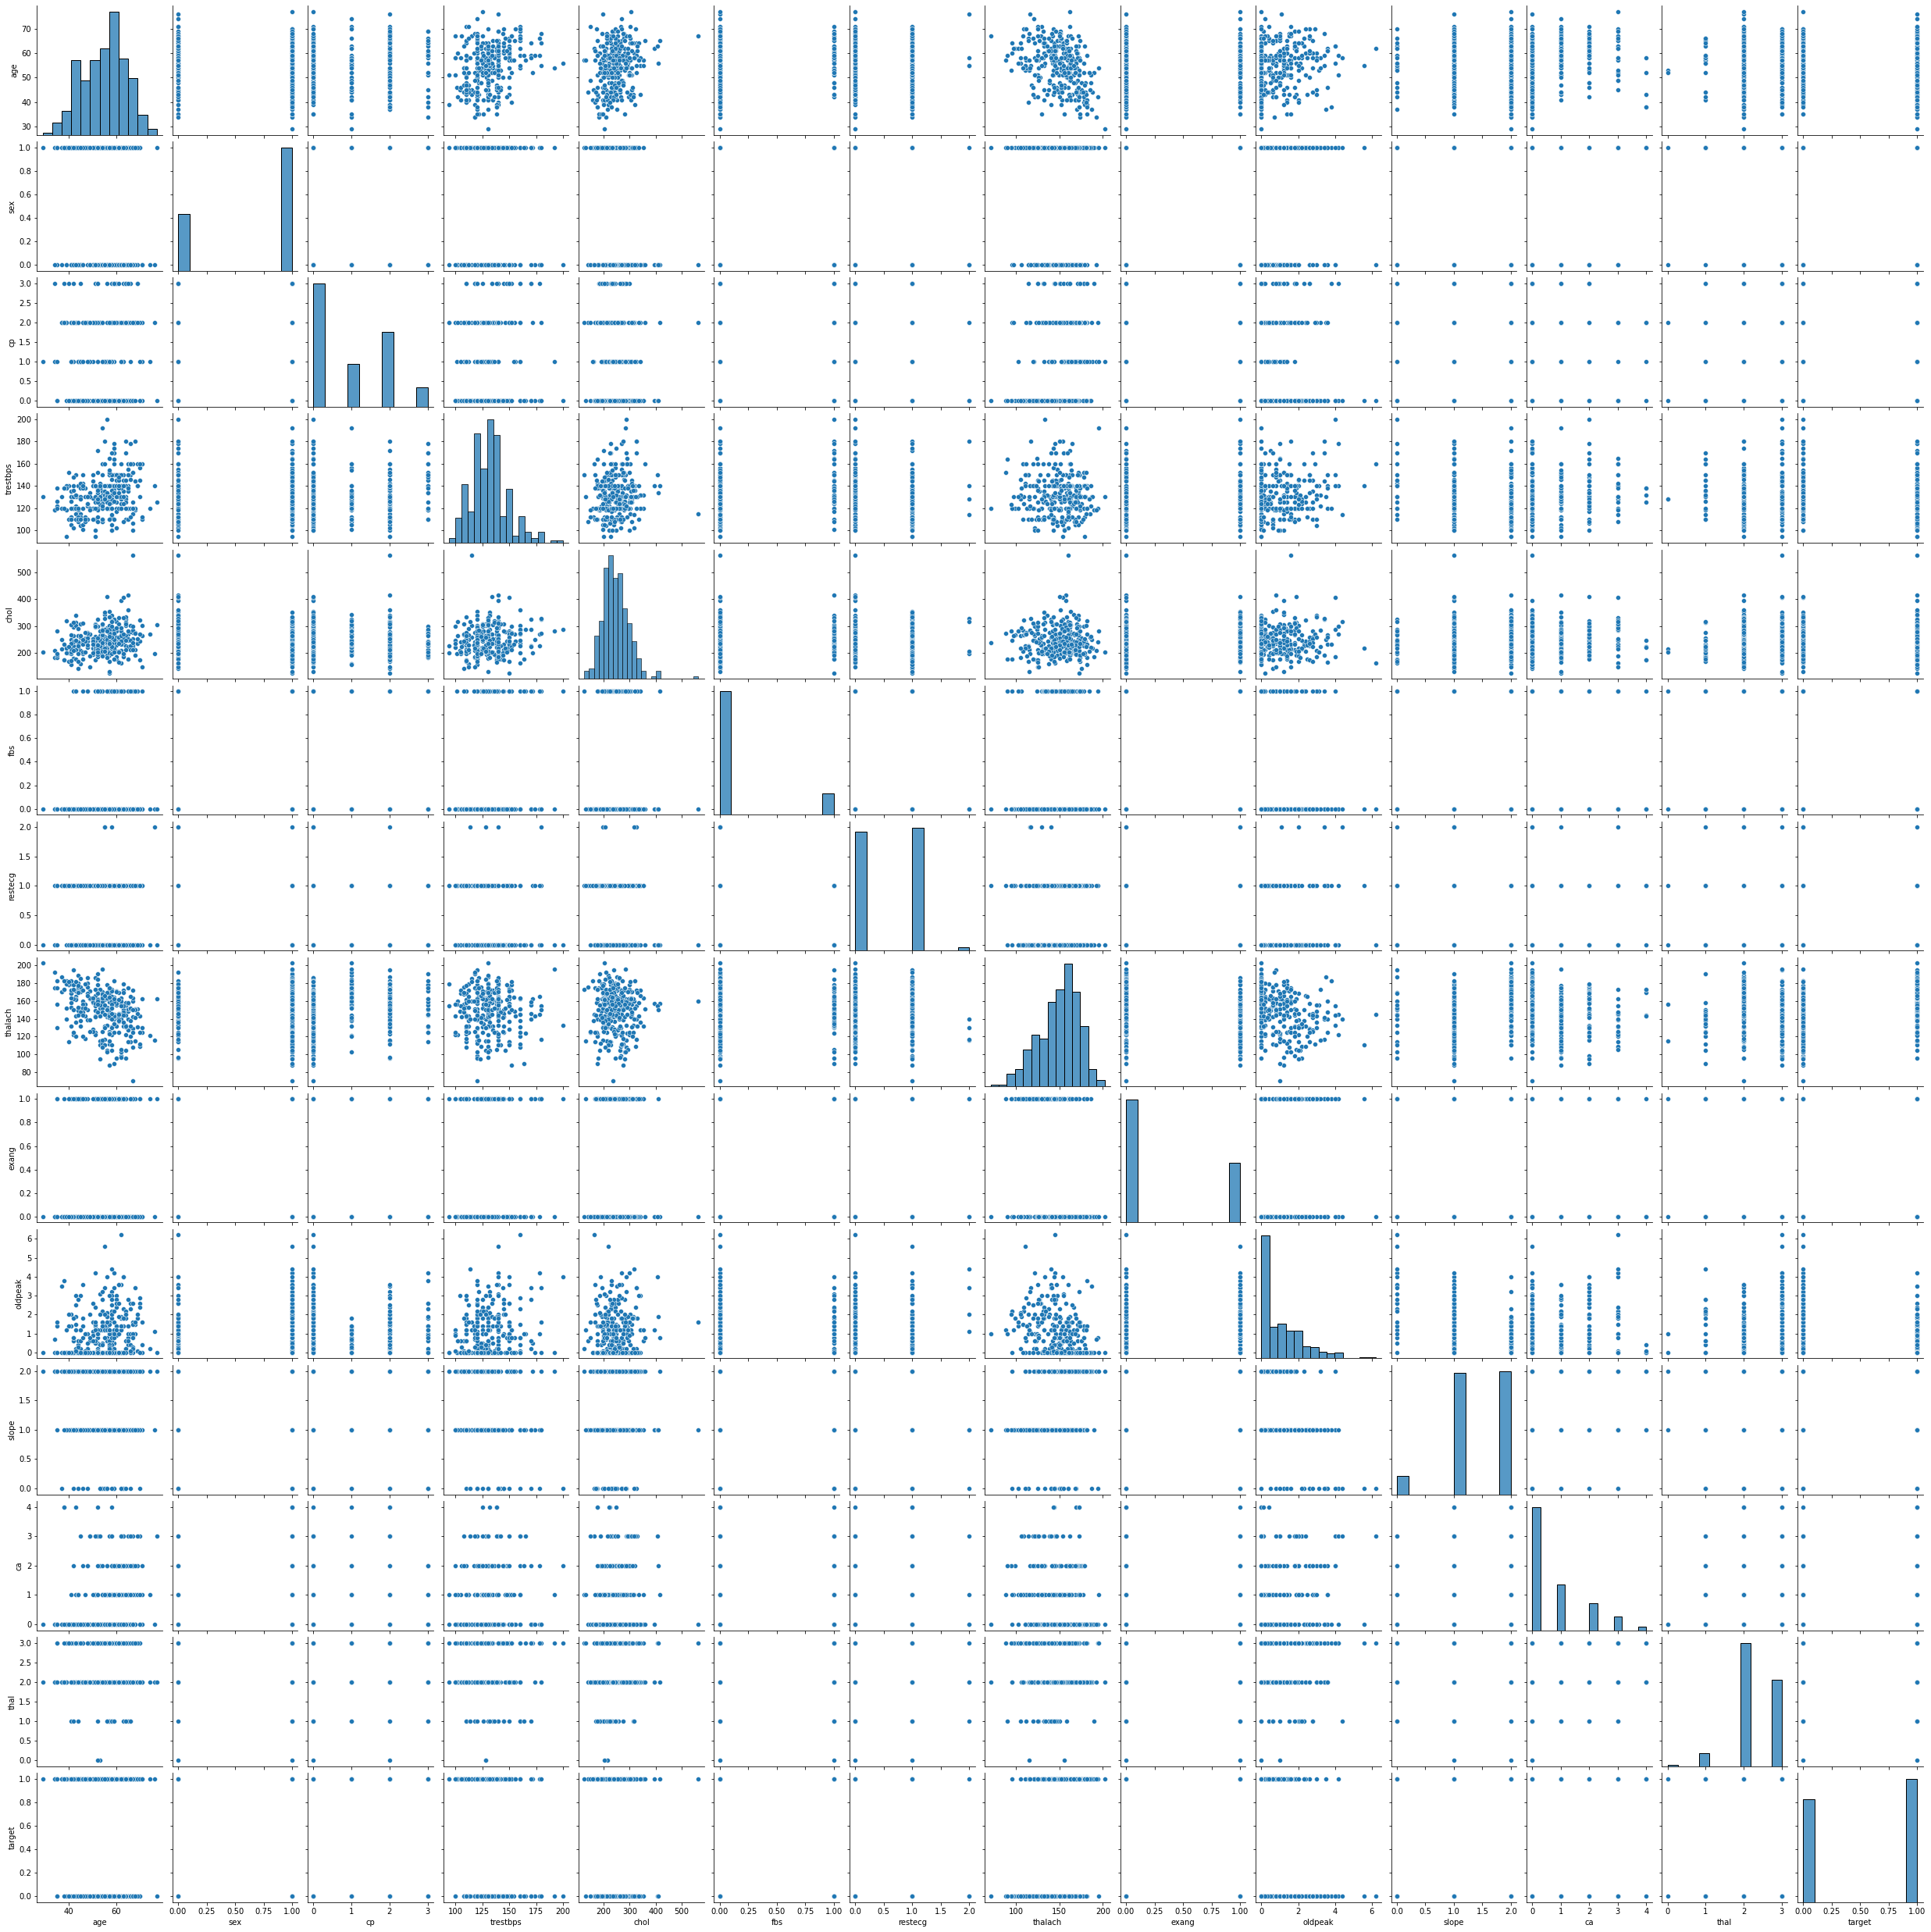

In [39]:
# The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. That creates plots as shown below.
sns.pairplot(df)

In [40]:
#Scaling and Splitting dataset
X_val = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [41]:
scaler = StandardScaler()

In [42]:
X = scaler.fit_transform(X_val)

In [43]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [44]:
#Using Logistic Regression
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

logpred = logmodel.predict(X_test)

print(classification_report(y_test,logpred),'\n')
print(confusion_matrix(y_test,logpred),'\n')

print(f"Accuracy Score : {round(accuracy_score(y_test, logpred) * 100, 2)}%")


              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61
 

[[25  4]
 [ 5 27]] 

Accuracy Score : 85.25%


In [45]:
# Using KNN
knn = KNeighborsClassifier(n_neighbors= 1)

knn = knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

print(classification_report(y_test,knn_pred),'\n')
print(confusion_matrix(y_test,knn_pred),'\n')

print(f"Accuracy Score : {round(accuracy_score(y_test, knn_pred) * 100, 2)}%")


              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61
 

[[26  3]
 [ 6 26]] 

Accuracy Score : 85.25%


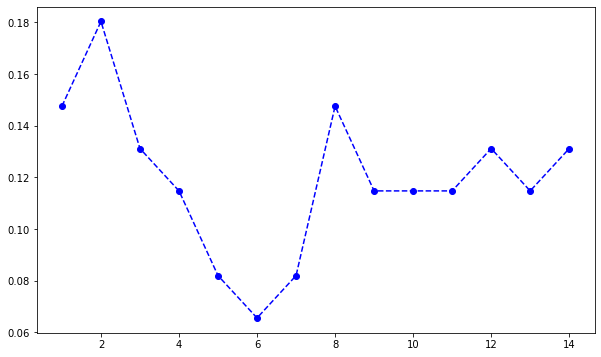

In [46]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue',linestyle='dashed',marker = 'o')

In [47]:
## Here we can see that that after around K>9 the error rate just tends to hover around 0.12 and 0.13
# Using KNN where k=9
knn = KNeighborsClassifier(n_neighbors= 9)

knn = knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

print(classification_report(y_test,knn_pred),'\n')
print(confusion_matrix(y_test,knn_pred),'\n')

print(f"Accuracy Score : {round(accuracy_score(y_test, knn_pred) * 100, 2)}%")

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61
 

[[27  2]
 [ 5 27]] 

Accuracy Score : 88.52%


In [48]:
# We are now printing the accuracy of Logistic Regression and KNN
print('Accuracy score for LogisticRegression:',round(accuracy_score(y_test,logpred)*100,2),'%','\n')

print('Accuracy score for KNN:',round(accuracy_score(y_test,knn_pred)*100,2),'%','\n')

Accuracy score for LogisticRegression: 85.25 % 

Accuracy score for KNN: 88.52 % 



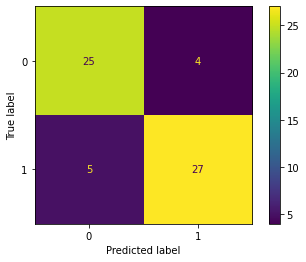

In [49]:
#plot confusion matrix for logistic regression model
plot_confusion_matrix(logmodel,X_test,y_test)

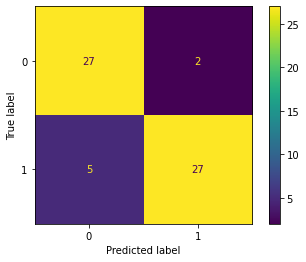

In [50]:
#plot confusion matrix for knn model
plot_confusion_matrix(knn,X_test,y_test)

In [51]:
# Here we can see that we are getting the mean accuracy , stdev accuaracy as well as max accuracy of each and every model declared below
# Here Kfold cross validation is one method that attempts to maximize the use of the available data for training and then testing a model
# make_pipeline : Constructs a pipeline from the given estimators
models = []
models.append(('Logistic Regression              ', LogisticRegression()))
models.append(('Linear Discriminant Analysis     ', LinearDiscriminantAnalysis()))
models.append(('Random Forest Classifier         ', RandomForestClassifier()))
models.append(('KNeighbors Classifier            ', KNeighborsClassifier()))
models.append(('Decision Tree Classifier         ', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes             ', GaussianNB()))
models.append(('Support vector machine Classifier', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
    pipeline.fit(X_train, y_train)
    cv_results = model_selection.cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s:  mean.Accuracy = %f | stdev.Accuracy = %f | max.Accuracy = %f" % (name, cv_results.mean()*100, cv_results.std()*100,cv_results.max()*100)
    print(msg," % \n")

Logistic Regression              :  mean.Accuracy = 78.150538 | stdev.Accuracy = 8.685723 | max.Accuracy = 90.322581  % 

Linear Discriminant Analysis     :  mean.Accuracy = 79.150538 | stdev.Accuracy = 6.938351 | max.Accuracy = 90.322581  % 

Random Forest Classifier         :  mean.Accuracy = 77.161290 | stdev.Accuracy = 7.793615 | max.Accuracy = 87.096774  % 

KNeighbors Classifier            :  mean.Accuracy = 79.139785 | stdev.Accuracy = 8.547136 | max.Accuracy = 87.096774  % 

Decision Tree Classifier         :  mean.Accuracy = 77.161290 | stdev.Accuracy = 9.444901 | max.Accuracy = 90.322581  % 

Gaussian Naive Bayes             :  mean.Accuracy = 78.182796 | stdev.Accuracy = 6.428894 | max.Accuracy = 87.096774  % 

Support vector machine Classifier:  mean.Accuracy = 78.161290 | stdev.Accuracy = 7.444317 | max.Accuracy = 87.096774  % 

